------
# **Dementia Patients -- Analysis and Prediction**
### ***Author : Akhilesh Vyas***
### ****Date : August, 2019****



# ***Result Plots***

- <a href='#00'>0. Setup </a>
    - <a href='#00.1'>0.1. Load libraries </a>
    - <a href='#00.2'>0.2. Define paths </a>

- <a href='#01'>1. Data Preparation </a>  
    - <a href='#01.1'>1.1. Read Data </a> 
    - <a href='#01.2'>1.2. Prepare data  </a>
    - <a href='#01.3'>1.3. Prepare target </a>
    - <a href='#01.4'>1.4. Removing Unwanted Features </a>
    
- <a href='#02'>2. Data Analysis</a> 
    - <a href='#02.1'>2.1. Feature </a> 
    - <a href='#02.2'>2.2. Target </a> 
    
- <a href='#03'>3. Data Preparation and Vector Transformation</a>

- <a href='#04'>4. Analysis and Imputing Missing Values </a>

- <a href='#05'>5. Feature Analysis</a> 
    - <a href='#05.1'>5.1. Correlation Matrix</a>
    - <a href='#05.2'>5.2. Feature and target </a>
    - <a href='#05.3'>5.3. Feature Selection Models </a>
    
- <a href='#06'>6.Machine Learning -Classification Model</a> 

# <a id='00'>0. Setup </a>

# <a id='00.1'>0.1 Load libraries </a>

Loading Libraries

In [1]:
import sys
sys.path.insert(1, '../preprocessing/')
import numpy as np
import pickle
import scipy.stats as spstats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.datasets.base import Bunch
from data_transformation_cls import FeatureTransform
from ast import literal_eval
import plotly.figure_factory as ff
import plotly.offline as py

import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


%matplotlib inline

# <a id='00.2'>0.2 Define paths </a>

In [2]:
# data_path
data_path = '../../../datalcdem/data/optima/dementia_18July/class_fast_normal_slow_type/'
result_path = '../../../datalcdem/data/optima/dementia_18July/class_fast_normal_slow_type/results/'

# <a id='1'>1. Data Preparation </a> 

## <a id='01.1'>1.1. Read Data</a>

In [3]:
# Reading Data

#patients data
patient_df = pd.read_csv(data_path+'patients.csv')
print (patient_df.dtypes)
# change dataType if there is something
for col in patient_df.columns: 
    if 'Date' in col:
        patient_df[col] = pd.to_datetime(patient_df[col]) 
 
display(patient_df.head(5))

patient_id                   int64  
gender                       object 
dementia                     bool   
smoker                       object 
alcohol                      object 
education                    object 
bmi                          float64
weight                       float64
ageAtFirstEpisode            int64  
ageAtLastEpisode             int64  
malignantComorbidity         object 
systemicComorbidity          object 
cardiovascularComorbidity    bool   
metabolicComorbidity         bool   
infectiousComorbidity        bool   
neoplasticComorbidity        bool   
respiratoryComorbidity       bool   
neurologicalComorbidity      bool   
inflammatoryComorbidity      bool   
apoe                         object 
epDateInicial                object 
mmseInicial                  int64  
mmseInicialDiscretized       object 
epDateFinal                  object 
mmseFinal                    int64  
mmseFinalDiscretized         object 
epDateToSevereData           object 
e

patient_id  gender  dementia     smoker           alcohol education   bmi  \
0  1           Male    False     smoker     mild_drinking     medium    28.0   
1  14          Female  False     no_smoker  mild_drinking     medium    19.0   
2  16          Male    False     no_smoker  extreme_drinking  higher   NaN     
3  19          Male    True      smoker     extreme_drinking  higher   NaN     
4  32          Male    False     no_smoker  mild_drinking     higher   NaN     

   weight  ageAtFirstEpisode  ageAtLastEpisode malignantComorbidity  \
0  81.0    71                 80                False                 
1  48.0    79                 88                False                 
2 NaN      78                 84                False                 
3 NaN      56                 61                True                  
4 NaN      72                 73                False                 

  systemicComorbidity  cardiovascularComorbidity  metabolicComorbidity  \
0  False               False                      False                  
1  True                True                       True                   
2  False               True                       False                  
3  True                False                      True                   
4  False               False                      False                  

   infectiousComorbidity  neoplasticComorbidity  respiratoryComorbidity  \
0  False                  False                  False                    
1  True                   False                  False                    
2  False                  False                  False                    
3  False                  False                  False                    
4  False                  False                  False                    

   neurologicalComorbidity  inflammatoryComorbidity  apoe epDateInicial  \
0  False                    False                    E3E3 1998-01-13      
1  False                    False                    E3E4 1990-03-26      
2  False                    False                    E3E4 1991-07-15      
3  False                    False                    E3E4 1989-09-27      
4  False                    False                    E3E3 1990-05-04      

   mmseInicial mmseInicialDiscretized epDateFinal  mmseFinal  \
0  30           normal                2007-05-04   30          
1  29           normal                1999-03-19   30          
2  28           normal                1996-10-21   26          
3  12           severe                1994-07-06  -1           
4  15           moderate              1991-03-26  -1           

  mmseFinalDiscretized epDateToSevereData epDateToMildData  \
0  normal              NaT                NaT                
1  normal              NaT                NaT                
2  normal              NaT                1995-07-03         
3  severe              1989-09-27         NaT                
4  severe              NaT                NaT                

  epDateToModerateData  
0 NaT                   
1 NaT                   
2 NaT                   
3 1990-03-27            
4 1990-05-04

In [4]:
# From API Data- comorbidities and treatments

# Treatment data
treatmnt_df = pd.read_csv(data_path+'Treatments.csv')
display(treatmnt_df.head(5))
treatmnt_dict = dict(zip(treatmnt_df['name'], treatmnt_df['CUI_ID']))
print ('\n Unique Treatment data size: {}\n'.format(len(treatmnt_dict)))

# Patient treatment data
patient_treatmnt_df = pd.read_csv(data_path+'patient_Treatments.csv')
patient_treatmnt_df['drugName_cui'] = patient_treatmnt_df['drugName'].apply(lambda x: treatmnt_dict[x])
# patient_treatmn_list_df = patient_treatmnt_df.groupby(by='patient_id', as_index=False).agg(lambda x: x.tolist()) # equivalent to below\n",
patient_treatmn_list_df = patient_treatmnt_df.groupby(by='patient_id', as_index=False).agg(lambda x: x.tolist())
display(patient_treatmn_list_df.head(5))

# Patient comorbidities data list
patient_treatmn_list = patient_treatmnt_df['drugName_cui'].unique()
print ('\n Unique Treatment data size: {}, Any NULL Value: {}\n'.format(patient_treatmn_list.size, pd.isnull(patient_treatmn_list).any()))

# Comorbidities data
comorb_df = pd.read_csv(data_path+'comorbidities.csv')
display(comorb_df.head(5))
comorb_dict = dict(zip(comorb_df['name'], comorb_df['CUI_ID']))
print ('\n Unique Comorbidities data size: {}\n'.format(len(comorb_dict)))

# Patient comorbidities data
patient_combor_df = pd.read_csv(data_path+'patient_Comorbidities.csv')
patient_combor_df['disorderName_cui'] = patient_combor_df['disorderName'].apply(lambda x: comorb_dict[x])
patient_combor_list_df = patient_combor_df.groupby(by=['patient_id'], as_index=False).agg(lambda x: x.tolist())
display(patient_combor_list_df.head(5))

# Patient comorbidities data list
patient_combor_list = patient_combor_df['disorderName_cui'].unique()
print ('\n Unique Comorbidities data size: {}, Any NULL Value: {}\n'.format(patient_combor_list.size, pd.isnull(patient_combor_list).any()))

name    CUI_ID  \
0  Atenolol             C0004147   
1  Calcium_supplements  C3540037   
2  Gliclazide           C0017631   
3  Diltiazem            C0012373   
4  Beconase             C0591154   

                                               DBpediaURL  
0  http://dbpedia.org/resource/Atenolol                    
1  http://dbpedia.org/resource/Creatine_supplements        
2  http://dbpedia.org/resource/Gliclazide                  
3  http://dbpedia.org/resource/Diltiazem                   
4  http://dbpedia.org/resource/Beclometasone_dipropionate


 Unique Treatment data size: 213



patient_id  \
0  1            
1  14           
2  16           
3  19           
4  36           

                                                              drugName  \
0  [Atenolol]                                                            
1  [Atenolol, Calcium_supplements, Gliclazide, Diltiazem]                
2  [Beconase, Acetaminophen, Burinex, Aquacobalamin, Hydroxocobalamin]   
3  [Tolbutamide]                                                         
4  [Magnesium_cation]                                                    

                                         drugName_cui  
0  [C0004147]                                          
1  [C0004147, C3540037, C0017631, C0012373]            
2  [C0591154, C0000970, C0591205, C0003663, C0020316]  
3  [C0040374]                                          
4  [C2346927]


 Unique Treatment data size: 213, Any NULL Value: False



name    CUI_ID  \
0  Diphtheria                                                C0012546   
1  Diabetes                                                  C0011847   
2  Heart_failure                                             C0018801   
3  Transient_ischemic_attack                                 C0007787   
4  Right_sided_cerebral_hemisphere_cerebrovascular_accident  C0586324   

                                              DBpediaURL  
0  http://dbpedia.org/resource/Diphtheria                 
1  http://dbpedia.org/resource/Diabetes_mellitus          
2  http://dbpedia.org/resource/Heart_failure              
3  http://dbpedia.org/resource/Transient_ischemic_attack  
4  http://dbpedia.org/resource/Stroke


 Unique Comorbidities data size: 84



patient_id  \
0  14           
1  16           
2  19           
3  54           
4  99           

                                                                            disorderName  \
0  [Diphtheria, Diabetes, Heart_failure, Transient_ischemic_attack]                        
1  [Right_sided_cerebral_hemisphere_cerebrovascular_accident, Transient_ischemic_attack]   
2  [Diabetes]                                                                              
3  [Mitral_valve_prolapse_syndrome]                                                        
4  [Bronchiectasis, Myocardial_infarction, Diphtheria]                                     

                           disorderName_cui  
0  [C0012546, C0011847, C0018801, C0007787]  
1  [C0586324, C0007787]                      
2  [C0011847]                                
3  [C0026267]                                
4  [C0006267, C0027051, C0012546]


 Unique Comorbidities data size: 84, Any NULL Value: False



In [5]:
#Preparation Features from Raw data

# Patient Comorbidities data
patient_com_raw_df = pd.read_csv(data_path + 'optima_patients_comorbidities.csv').groupby(by=['patient_id', 'EPISODE_DATE'], as_index=False).agg(lambda x: x.tolist())[['patient_id', 'EPISODE_DATE', 'Comorbidity_cui']]
display(patient_com_raw_df.head(5))
patient_com_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_com_raw_df['EPISODE_DATE'])


# Patient Treatment data
patient_treat_raw_df = pd.read_csv(data_path + 'optima_patients_treatments.csv').groupby(by=['patient_id', 'EPISODE_DATE'], as_index=False).agg(lambda x: x.tolist())[['patient_id', 'EPISODE_DATE', 'Medication_cui']]
display(patient_treat_raw_df.head(5))
patient_treat_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_treat_raw_df['EPISODE_DATE'])

# Join Patient Treatment and Comorbidities data
patient_com_treat_raw_df = pd.merge(patient_com_raw_df, patient_treat_raw_df,on=['patient_id', 'EPISODE_DATE'], how='outer')
patient_com_treat_raw_df.sort_values(by=['patient_id', 'EPISODE_DATE'],axis=0, inplace=True, ascending=True)
patient_com_treat_raw_df.reset_index(drop=True, inplace=True)
display(patient_com_treat_raw_df.head(5))


# Prepare Dictionary Replace CUI values with Medication Types and Comorbidities Types
# Medication type: types dementia_drugs_treatments_types.csv
# comorbidities type : optima_patients_comorbidities
patient_comcui_comtype = pd.read_csv(data_path + 'optima_patients_comorbidities.csv')[['Comorbidity_cui', 'Comorbidity_Type']]
patient_comcui_comtype_dict = dict(zip(patient_comcui_comtype['Comorbidity_cui'], patient_comcui_comtype['Comorbidity_Type']))
display(patient_comcui_comtype.info(), len(patient_comcui_comtype_dict))

patient_treatcui_treattype = pd.read_csv(data_path + 'dementia_drugs_treatments_types.csv')[['CUI_ID', 'Drug_Group']]
patient_treatcui_treattype_dict = dict(zip(patient_treatcui_treattype['CUI_ID'], patient_treatcui_treattype['Drug_Group']))
display(patient_treatcui_treattype.info(), len(patient_treatcui_treattype_dict))

def comcui_comtype(x):
    t = []
    if (type(x)==list):
        for n, i in enumerate(x):
            t.append(patient_comcui_comtype_dict[i])
    else:
        return np.nan
    return list(set(pd.Series(t).dropna().tolist()))

def treatcui_treattype(x):
    t = []
    if (type(x)==list):
        for n, i in enumerate(x):
            t.append(patient_treatcui_treattype_dict[i])
    else:
        return np.nan
    return list(set(pd.Series(t).dropna().tolist()))
            

patient_com_treat_raw_df['Comorbidity_Type'] = patient_com_treat_raw_df['Comorbidity_cui'].apply(comcui_comtype)
patient_com_treat_raw_df['Medication_Type'] = patient_com_treat_raw_df['Medication_cui'].apply(treatcui_treattype)
display (patient_com_treat_raw_df.head(5))
patient_com_treat_type_raw_df = patient_com_treat_raw_df.drop(columns=['Comorbidity_Type', 'Comorbidity_cui', 'Medication_cui'])
#Saving data
patient_com_treat_type_raw_df.to_csv(data_path + 'patient_com_treat_type_episode_df.csv', index=False)

# Extracting selected features from Raw data
df_datarequest = pd.read_excel(data_path+'../../optima_excel/' +'Data_Request_Jan_2019_final.xlsx')
display(df_datarequest.head(1))
df_datarequest_features = df_datarequest[['GLOBAL_PATIENT_DB_ID', 'Age At Episode', 'EPISODE_DATE', 'CAMDEX SCORES: MINI MENTAL SCORE']]
df_datarequest_features.rename(columns={'GLOBAL_PATIENT_DB_ID':'patient_id', 'Age At Episode':'Age_At_Episode'}, inplace=True)
display(df_datarequest_features.head(5))

# Merging Join Patient Treatment, Comorbidities and selected features from raw data
patient_com_treat_type_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_com_treat_type_raw_df['EPISODE_DATE'])
patient_com_treat_fea_raw_df = pd.merge(patient_com_treat_type_raw_df,df_datarequest_features,on=['patient_id', 'EPISODE_DATE'], how='left')
patient_com_treat_fea_raw_df.sort_values(by=['patient_id', 'EPISODE_DATE'],axis=0, inplace=True, ascending=True)
patient_com_treat_fea_raw_df.reset_index(inplace=True, drop=True)
display(patient_com_treat_fea_raw_df.head(5))

# Filling misssing MMSE value with patient group Average
patient_com_treat_fea_raw_df['CAMDEX SCORES: MINI MENTAL SCORE']\
                                        = patient_com_treat_fea_raw_df.groupby(by=['patient_id'])['CAMDEX SCORES: MINI MENTAL SCORE'].transform(lambda x: x.fillna(x.mean()))
display(patient_com_treat_fea_raw_df.head(5))

#  19<=Mild<=24 , 14<=Moderate<=18 , Severe<=13 
def change_minimentalscore_to_category(df):
    df.loc[df['CAMDEX SCORES: MINI MENTAL SCORE']>24,'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Normal'
    df.loc[(df['CAMDEX SCORES: MINI MENTAL SCORE']<=24) & (df['CAMDEX SCORES: MINI MENTAL SCORE']>=19),
           'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Mild'
    df.loc[(df['CAMDEX SCORES: MINI MENTAL SCORE']<=18) & (df['CAMDEX SCORES: MINI MENTAL SCORE']>=14),
           'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Moderate'
    df.loc[df['CAMDEX SCORES: MINI MENTAL SCORE']<=13,'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Severe'
    
    return df

patient_com_treat_fea_raw_df = change_minimentalscore_to_category(patient_com_treat_fea_raw_df)

# saving file
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_raw_without_expand_df.csv', index=False)

# Set line number for treatment line
def setLineNumber(lst):
    lst_dict = {ide:0 for ide in lst}
    lineNumber_list = []
    
    for idx in lst:
        if idx in lst_dict:
           lst_dict[idx] = lst_dict[idx] + 1 
           lineNumber_list.append(lst_dict[idx])
            
    return lineNumber_list

patient_com_treat_fea_raw_df['lineNumber'] = setLineNumber(patient_com_treat_fea_raw_df['patient_id'].tolist())
display(patient_com_treat_fea_raw_df.head(5))

# Extend episode data into columns
def extend_episode_data(df):
    id_dict = {i:0 for i in df['patient_id'].tolist()}
    for x in df['patient_id'].tolist():
        if x in id_dict:
            id_dict[x]=id_dict[x]+1
    
    line_updated = [int(j) for i in id_dict.values() for j in range(1,i+1)]
    # print (line_updated[0:10])
    df.update(pd.Series(line_updated, name='lineNumber'),errors='ignore')
    print ('\n----------------After creating line-number for each patients------------------')
    display(df.head(20))
    
    # merging episodes based on id and creating new columns for each episode
    r = df['lineNumber'].max()
    print ('Max line:',r)
    l = [df[df['lineNumber']==i] for i in range(1, int(r+1))]
    print('Number of Dfs to merge: ',len(l))
    df_new = pd.DataFrame()
    tmp_id = []
    for i, df_l in enumerate(l):
        df_l = df_l[~df_l['patient_id'].isin(tmp_id)]
        for j, df_ll in enumerate(l[i+1:]):
            #df_l = df_l.merge(df_ll, on='id', how='left', suffix=(str(j), str(j+1))) #suffixe is not working
            #print (j)
            df_l = df_l.join(df_ll.set_index('patient_id'), on='patient_id', rsuffix='_'+str(j+1))
        tmp_id = tmp_id + df_l['patient_id'].tolist()
        #display(df_l)
        df_new = df_new.append(df_l, ignore_index=True, sort=False)
        return df_new
    


patient_com_treat_fea_raw_df['lineNumber'] = setLineNumber(patient_com_treat_fea_raw_df['patient_id'].tolist())
patient_com_treat_fea_raw_df = patient_com_treat_fea_raw_df.drop_duplicates(subset=['patient_id', 'EPISODE_DATE'])
patient_com_treat_fea_raw_df = extend_episode_data(patient_com_treat_fea_raw_df)
display(patient_com_treat_fea_raw_df.head(2))


#Saving extended episode of each patients
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_raw_df.csv', index=False)


# Take only 10 episodes of the patients
fltr_linnum = ['_'+str(i) for i in range(10, 27)]
print (fltr_linnum)
patient_com_treat_fea_raw_df.drop(columns=[col for col in patient_com_treat_fea_raw_df.columns for i in fltr_linnum if i in col], inplace=True)
patient_com_treat_fea_raw_df = patient_com_treat_fea_raw_df.drop([col for col in patient_com_treat_fea_raw_df.columns if 'lineNumber' in col], axis=1).reset_index(drop=True)
#Saving extended episode of each patients
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_0_9_raw_df.csv', index=False)




patient_id EPISODE_DATE                 Comorbidity_cui
0  14          1992-04-28   [C0012546]                    
1  14          1999-03-19   [C0011847, C0018801, C0007787]
2  16          1991-07-15   [C0586324, C0007787]          
3  19          1990-09-17   [C0011847]                    
4  19          1991-11-12   [C0011847]

patient_id EPISODE_DATE Medication_cui
0  1           1998-01-13   [C0004147]   
1  1           1998-12-14   [C0004147]   
2  1           2000-01-20   [C0004147]   
3  14          1994-04-14   [C0004147]   
4  14          1995-04-27   [C0004147]

patient_id EPISODE_DATE Comorbidity_cui Medication_cui
0  1          1998-01-13    NaN             [C0004147]   
1  1          1998-12-14    NaN             [C0004147]   
2  1          2000-01-20    NaN             [C0004147]   
3  14         1992-04-28    [C0012546]      NaN          
4  14         1994-04-14    NaN             [C0004147]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
Comorbidity_cui     380 non-null object
Comorbidity_Type    380 non-null object
dtypes: object(2)
memory usage: 6.1+ KB


None

85

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
CUI_ID        213 non-null object
Drug_Group    200 non-null object
dtypes: object(2)
memory usage: 3.5+ KB


None

213

patient_id EPISODE_DATE Comorbidity_cui Medication_cui Comorbidity_Type  \
0  1          1998-01-13    NaN             [C0004147]     NaN               
1  1          1998-12-14    NaN             [C0004147]     NaN               
2  1          2000-01-20    NaN             [C0004147]     NaN               
3  14         1992-04-28    [C0012546]      NaN            [Neurological]    
4  14         1994-04-14    NaN             [C0004147]     NaN               

      Medication_Type  
0  [AntiHypertension]  
1  [AntiHypertension]  
2  [AntiHypertension]  
3  NaN                 
4  [AntiHypertension]

GLOBAL_PATIENT_DB_ID STUDY_ID      STUDY DOD  Age At Episode GENDER  \
0  1                     C1048    Challenge NaT  71              Male    

  EPISODE_DATE EPISODE CAMDEX ADMINISTRATION 1-12: DATE OF EXAMINATION  \
0 1998-01-13    1       1998-01-13 00:00:00                              

   CAMDEX ADMINISTRATION 1-12: EST SEVERITY OF DEMENTIA  \
0  0.0                                                    

   CAMDEX ADMINISTRATION 1-12: EST OF SEVERITY OF DEPRESSION  \
0  0.0                                                         

   CAMDEX ADMINISTRATION 1-12: VISUALLY IMPAIRED  \
0  9.0                                             

   CAMDEX ADMINISTRATION 1-12: HARD OF HEARING  \
0  9.0                                           

   CAMDEX ADMINISTRATION 1-12: TOTALLY CARED FOR  \
0  9.0                                             

   CAMDEX ADMINISTRATION 1-12: OTHER SIGNIFICANT IMPAIRMENT  \
0  9.0                                                        

  CAMDEX ADMINISTRATION 1-12: OTHER SIGNIFICANT IMPAIRMENT: TEXT  \
0  NaN                                                             

   PRESENT STATE 13-46: PRESENT STATE 13-46  \
0  2.0                                        

   PRESENT STATE 13-46: (013) NAME KNOWN  \
0  1.0                                     

   PRESENT STATE 13-46: (014) AGE KNOWN  \
0  1.0                                    

   PRESENT STATE 13-46: (015) DATE OF BIRTH KNOWN  \
0  1.0                                              

   PRESENT STATE 13-46: (016) AGE LEFT SCHOOL  \
0  17.0                                         

   PRESENT STATE 13-46: (017) YEARS IN FURTHER EDUCATION  \
0  3.0                                                     

                      PRESENT STATE 13-46: (017) YEARS IN FURTHER EDUCATION: TEXT  \
0  6 month short course then to Army for 9 years.  Oxford 2 years  London 1 year.   

  PRESENT STATE 13-46: (018) LIVING ARRANGEMENTS  \
0  4                                               

   PRESENT STATE 13-46: (019) HEADACHE  PRESENT STATE 13-46: (020) DIZZYNESS  \
0  0.0                                  0.0                                    

   PRESENT STATE 13-46: (021) FALLS  PRESENT STATE 13-46: (022) TIA  \
0  0.0                               0.0                              

   PRESENT STATE 13-46: (023) FALLS ASLEEP  \
0  0.0                                       

   PRESENT STATE 13-46: (024) WAKEFUL  PRESENT STATE 13-46: (025) WAKES EARLY  \
0  0.0                                 0.0                                      

  PRESENT STATE 13-46: (025) WAKES EARLY: TEXT  \
0  NaN                                           

   PRESENT STATE 13-46: (026) APPETITE CHANGE  \
0  0.0                                          

   PRESENT STATE 13-46: (027) WEIGHT CHANGE  \
0  0.0                                        

  PRESENT STATE 13-46: (027) WEIGHT CHANGE: TEXT  \
0  NaN                                             

   PRESENT STATE 13-46: (028) COPING LESS  \
0  0.0                                      

   PRESENT STATE 13-46: (029) DECISION MAKING DIFFICULT  \
0  0.0                                                    

   PRESENT STATE 13-46: (030) PLEASURE LOSS  \
0  0.0                                        

  PRESENT STATE 13-46: (031) ENERGY LOSS  \
0  1                                       

   PRESENT STATE 13-46: (032) ALONE PREFERENCE  \
0  0.0                                           

   PRESENT STATE 13-46: (033) CONCENTRATION DIFFICULT  \
0  0.0                                                  

   PRESENT STATE 13-46: (034) SLOWED SPEECH  \
0  0.0                                        

   PRESENT STATE 13-46: (035) SLOWED THOUGHT  \
0  0.0                                         

   PRESENT STATE 13-46: (036) FEELING DEPRESSED  \
0  0.0                                            

   PRESENT STATE 13-46: (037) DURATION OF DEPRESSION  \
0 NaN                                                  

   PRESENT STATE 13-46: (038) 

patient_id  Age_At_Episode EPISODE_DATE  CAMDEX SCORES: MINI MENTAL SCORE
0  1           71             1998-01-13    30.0                            
1  1           72             1998-12-14   NaN                              
2  1           73             2000-01-20    30.0                            
3  1           73             2000-08-18   NaN                              
4  1           75             2002-02-21    30.0

patient_id EPISODE_DATE     Medication_Type  Age_At_Episode  \
0  1          1998-01-13    [AntiHypertension]  71               
1  1          1998-12-14    [AntiHypertension]  72               
2  1          2000-01-20    [AntiHypertension]  73               
3  14         1992-04-28    NaN                 81               
4  14         1994-04-14    [AntiHypertension]  83               

   CAMDEX SCORES: MINI MENTAL SCORE  
0  30.0                              
1 NaN                                
2  30.0                              
3  28.0                              
4  30.0

patient_id EPISODE_DATE     Medication_Type  Age_At_Episode  \
0  1          1998-01-13    [AntiHypertension]  71               
1  1          1998-12-14    [AntiHypertension]  72               
2  1          2000-01-20    [AntiHypertension]  73               
3  14         1992-04-28    NaN                 81               
4  14         1994-04-14    [AntiHypertension]  83               

   CAMDEX SCORES: MINI MENTAL SCORE  
0  30.0                              
1  30.0                              
2  30.0                              
3  28.0                              
4  30.0

patient_id EPISODE_DATE     Medication_Type  Age_At_Episode  \
0  1          1998-01-13    [AntiHypertension]  71               
1  1          1998-12-14    [AntiHypertension]  72               
2  1          2000-01-20    [AntiHypertension]  73               
3  14         1992-04-28    NaN                 81               
4  14         1994-04-14    [AntiHypertension]  83               

   CAMDEX SCORES: MINI MENTAL SCORE CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY  \
0  30.0                              Normal                                     
1  30.0                              Normal                                     
2  30.0                              Normal                                     
3  28.0                              Normal                                     
4  30.0                              Normal                                     

   lineNumber  
0  1           
1  2           
2  3           
3  1           
4  2


----------------After creating line-number for each patients------------------


patient_id EPISODE_DATE                   Medication_Type  Age_At_Episode  \
0   1          1998-01-13    [AntiHypertension]                71               
1   1          1998-12-14    [AntiHypertension]                72               
2   1          2000-01-20    [AntiHypertension]                73               
3   14         1992-04-28    NaN                               81               
4   14         1994-04-14    [AntiHypertension]                83               
5   14         1995-04-27    [AntiHypertension]                84               
6   14         1996-03-18    [AntiHypertension]                85               
7   14         1997-03-27    [Supplement, AntiHypertension]    86               
8   14         1998-04-16    [Antidiabetic, AntiHypertension]  87               
9   14         1999-03-19    [Antidiabetic, AntiHypertension]  88               
10  16         1991-07-15    NaN                               78               
11  16         1993-09-22    [Antiallergic]                    81               
12  16         1994-09-05    [Antiallergic]                    82               
13  16         1995-07-03    [Painreliever]                    82               
14  16         1996-10-21    [Supplement, AntiHypertension]    84               
15  19         1990-09-17    [Antidiabetic]                    57               
16  19         1991-04-12    [Antidiabetic]                    58               
17  19         1991-11-12    [Antidiabetic]                    58               
18  19         1992-05-20    [Antidiabetic]                    59               
19  19         1992-11-10    [Antidiabetic]                    59               

    CAMDEX SCORES: MINI MENTAL SCORE  \
0   30.0                               
1   30.0                               
2   30.0                               
3   28.0                               
4   30.0                               
5   30.0                               
6   29.0                               
7   30.0                               
8   30.0                               
9   30.0                               
10  28.0                               
11  28.0                               
12  25.0                               
13  24.0                               
14  26.0                               
15  15.0                               
16  5.0                                
17  7.0                                
18  6.0                                
19  0.0                                

   CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY  lineNumber  
0   Normal                                    1           
1   Normal                                    2           
2   Normal                                    3           
3   Normal                                    1           
4   Normal                                    2           
5   Normal                                    3           
6   Normal                                    4           
7   Normal                                    5           
8   Normal                                    6           
9   Normal                                    7           
10  Normal                                    1           
11  Normal                                    2           
12  Normal                                    3           
13  Mild                                      4           
14  Normal                                    5           
15  Moderate                                  1           
16  Severe                                    2           
17  Severe                                    3           
18  Severe                                    4           
19  Severe                                    5

Max line: 27
Number of Dfs to merge:  27


patient_id EPISODE_DATE     Medication_Type  Age_At_Episode  \
0  1          1998-01-13    [AntiHypertension]  71               
1  14         1992-04-28    NaN                 81               

   CAMDEX SCORES: MINI MENTAL SCORE CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY  \
0  30.0                              Normal                                     
1  28.0                              Normal                                     

   lineNumber EPISODE_DATE_1   Medication_Type_1  Age_At_Episode_1  \
0  1          1998-12-14      [AntiHypertension]  72.0               
1  1          1994-04-14      [AntiHypertension]  83.0               

   CAMDEX SCORES: MINI MENTAL SCORE_1  \
0  30.0                                 
1  30.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_1  lineNumber_1 EPISODE_DATE_2  \
0  Normal                                      2.0          2000-01-20       
1  Normal                                      2.0          1995-04-27       

    Medication_Type_2  Age_At_Episode_2  CAMDEX SCORES: MINI MENTAL SCORE_2  \
0  [AntiHypertension]  73.0              30.0                                 
1  [AntiHypertension]  84.0              30.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_2  lineNumber_2 EPISODE_DATE_3  \
0  Normal                                      3.0          NaT              
1  Normal                                      3.0          1996-03-18       

    Medication_Type_3  Age_At_Episode_3  CAMDEX SCORES: MINI MENTAL SCORE_3  \
0  NaN                NaN               NaN                                   
1  [AntiHypertension]  85.0              29.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_3  lineNumber_3 EPISODE_DATE_4  \
0  NaN                                        NaN           NaT              
1  Normal                                      4.0          1997-03-27       

                Medication_Type_4  Age_At_Episode_4  \
0  NaN                            NaN                 
1  [Supplement, AntiHypertension]  86.0               

   CAMDEX SCORES: MINI MENTAL SCORE_4  \
0 NaN                                   
1  30.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_4  lineNumber_4 EPISODE_DATE_5  \
0  NaN                                        NaN           NaT              
1  Normal                                      5.0          1998-04-16       

                  Medication_Type_5  Age_At_Episode_5  \
0  NaN                              NaN                 
1  [Antidiabetic, AntiHypertension]  87.0               

   CAMDEX SCORES: MINI MENTAL SCORE_5  \
0 NaN                                   
1  30.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_5  lineNumber_5 EPISODE_DATE_6  \
0  NaN                                        NaN           NaT              
1  Normal                                      6.0          1999-03-19       

                  Medication_Type_6  Age_At_Episode_6  \
0  NaN                              NaN                 
1  [Antidiabetic, AntiHypertension]  88.0               

   CAMDEX SCORES: MINI MENTAL SCORE_6  \
0 NaN                                   
1  30.0                                 

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_6  lineNumber_6 EPISODE_DATE_7  \
0  NaN                                        NaN           NaT              
1  Normal                                      7.0          NaT              

  Medication_Type_7  Age_At_Episode_7  CAMDEX SCORES: MINI MENTAL SCORE_7  \
0  NaN              NaN               NaN                                   
1  NaN              NaN               NaN                                   

  CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_7  lineNumber_7 EPISODE_DATE_8  \
0  NaN                                        NaN           NaT              
1  NaN                                        NaN           NaT      

['_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22', '_23', '_24', '_25', '_26']


## <a id='01.2'>1.2. Prepare data  </a>

In [6]:
# Merging Treatment and comorbidities dataframe from API to Patients
'''patient_df = patient_df.merge(patient_combor_list_df[['patient_id', 'disorderName_cui']], on='patient_id', how='left')
patient_df = patient_df.merge(patient_treatmn_list_df[['patient_id', 'drugName_cui']], on='patient_id', how='left')
display(patient_df.head(5))

# Converting all columns containing list data of Patients into separte columns
columns_list = ['disorderName_cui', 'drugName_cui']
classeslist = [patient_combor_list, patient_treatmn_list]
featuretransform = FeatureTransform(patient_df)
patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='multiLabel', classes=clss, data_type_func='ordinal', literal=False) for col, clss in zip(columns_list, classeslist)][-1]

patient_df.head(1)'''
# extract Comorbidity type from patient_com_treat_raw_df without episodes
from itertools import chain

def comcui_comtype(x):
    t = []
    if (type(x)==list):
        for n, i in enumerate(x):
            t.append(patient_comcui_comtype_dict[i])
    else:
        return np.nan
    return list(set(pd.Series(t).dropna().tolist()))


def listoflist_to_list(l):
    ini_list = l
    flatten_list1 = list(chain.from_iterable(ini_list))
    return list(set(flatten_list1))
            
    
patient_com_raw_without_eps_df = patient_com_raw_df.drop(columns=['EPISODE_DATE']).groupby(by=['patient_id'], as_index=False).agg(lambda x: x.tolist())
patient_com_raw_without_eps_df['Comorbidity_cui'] = patient_com_raw_without_eps_df['Comorbidity_cui'].apply(listoflist_to_list)
patient_com_raw_without_eps_df['Comorbidity_Type'] = patient_com_raw_without_eps_df['Comorbidity_cui'].apply(comcui_comtype)
patient_com_raw_without_eps_df = patient_com_raw_without_eps_df.drop(columns=['Comorbidity_cui'])
display(patient_com_raw_without_eps_df.head(5))

# Merging selected features from raw data dataframe to Patients
patient_df = patient_df.merge(patient_com_raw_without_eps_df, on='patient_id', how='left')
patient_df = patient_df.merge(patient_com_treat_fea_raw_df, on='patient_id', how='left')
display(patient_df.head(5))



patient_id                              Comorbidity_Type
0  14          [Cardiovascular, Metabolic, Neurological]   
1  16          [Cardiovascular, Metabolic]                 
2  19          [Metabolic]                                 
3  54          [Cardiovascular]                            
4  99          [Musculoskeletal, Respiratory, Neurological]

patient_id  gender  dementia     smoker           alcohol education   bmi  \
0  1           Male    False     smoker     mild_drinking     medium    28.0   
1  14          Female  False     no_smoker  mild_drinking     medium    19.0   
2  16          Male    False     no_smoker  extreme_drinking  higher   NaN     
3  19          Male    True      smoker     extreme_drinking  higher   NaN     
4  32          Male    False     no_smoker  mild_drinking     higher   NaN     

   weight  ageAtFirstEpisode  ageAtLastEpisode malignantComorbidity  \
0  81.0    71                 80                False                 
1  48.0    79                 88                False                 
2 NaN      78                 84                False                 
3 NaN      56                 61                True                  
4 NaN      72                 73                False                 

  systemicComorbidity  cardiovascularComorbidity  metabolicComorbidity  \
0  False               False                      False                  
1  True                True                       True                   
2  False               True                       False                  
3  True                False                      True                   
4  False               False                      False                  

   infectiousComorbidity  neoplasticComorbidity  respiratoryComorbidity  \
0  False                  False                  False                    
1  True                   False                  False                    
2  False                  False                  False                    
3  False                  False                  False                    
4  False                  False                  False                    

   neurologicalComorbidity  inflammatoryComorbidity  apoe epDateInicial  \
0  False                    False                    E3E3 1998-01-13      
1  False                    False                    E3E4 1990-03-26      
2  False                    False                    E3E4 1991-07-15      
3  False                    False                    E3E4 1989-09-27      
4  False                    False                    E3E3 1990-05-04      

   mmseInicial mmseInicialDiscretized epDateFinal  mmseFinal  \
0  30           normal                2007-05-04   30          
1  29           normal                1999-03-19   30          
2  28           normal                1996-10-21   26          
3  12           severe                1994-07-06  -1           
4  15           moderate              1991-03-26  -1           

  mmseFinalDiscretized epDateToSevereData epDateToMildData  \
0  normal              NaT                NaT                
1  normal              NaT                NaT                
2  normal              NaT                1995-07-03         
3  severe              1989-09-27         NaT                
4  severe              NaT                NaT                

  epDateToModerateData                           Comorbidity_Type  \
0 NaT                   NaN                                         
1 NaT                   [Cardiovascular, Metabolic, Neurological]   
2 NaT                   [Cardiovascular, Metabolic]                 
3 1990-03-27            [Metabolic]                                 
4 1990-05-04            NaN                                         

  EPISODE_DATE     Medication_Type  Age_At_Episode  \
0 1998-01-13    [AntiHypertension]  71.0             
1 1992-04-28    NaN                 81.0             
2 1991-07-15    NaN                 78.0             
3 1990-09-17    [Antidiabetic]      57.0             
4 NaT           NaN                NaN               

   CAMDEX SCORES: MINI MENTAL SCORE CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY  \
0  30.0                              Normal                                     
1  28.0                              Normal                                     
2  28.0

In [7]:
# Transform list data to individual columns
featuretransform = FeatureTransform(patient_df)
classes_list = [list(featuretransform.extract_value_frm_list(patient_df[col].dropna().tolist())) 
                for col in patient_df.columns if 'Comorbidity_Type' in col or 'Medication_Type' in col ]
columns_list = [col for col in patient_df.columns if 'Comorbidity_Type' in col or 'Medication_Type' in col ]

patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='multiLabel', classes=clss, data_type_func='ordinal', literal=False) 
 for col, clss in zip(columns_list, classes_list)][-1]

# Calculate maximum episodes for patients
patient_df['Max_EPISODE']  = np.argmax(np.asarray([((patient_df[col] - patient_df['EPISODE_DATE'])/np.timedelta64(1, 'D'))/365.25
     for col in patient_df.columns if 'EPISODE_DATE' in col]), axis=0)

# Calculate Final Episode Date-First Episode date difference
patient_df['EPISODE_Duration(Years)']  = np.nanmax(np.asarray([((patient_df[col] - patient_df['EPISODE_DATE'])/np.timedelta64(1, 'D'))/365.25
     for col in patient_df.columns if 'EPISODE_DATE' in col]), axis=0)


# Calculate last episode MMSE Category
x_all_mmmse_ep_array = np.asarray([patient_df[col] for col in patient_df.columns if 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY' in col])

patient_df['Last_EPISODE_MMSE_Category']  = x_all_mmmse_ep_array[[r-1 for r in patient_df['Max_EPISODE']],[c for c in range(x_all_mmmse_ep_array.shape[1])]]

# saving complete prepocessed file
patient_df.to_csv(data_path+'patient_df_complete.csv', index=False)

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:951: UserWarning:

unknown class(es) ['[', ']'] will be ignored

/home/vyasa/pythonEnv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

All-NaN slice encountered



## <a id='01.3'>1.3. Prepare target </a>

In [8]:
def calculate_class(patient_df, mmseInicialDiscretized, mmseFinalDiscretized, time1, time2, label):
    #return np.where((patient_df['mmseInicialDiscretized']==mmseInicialDiscretized) & (patient_df['mmseFinalDiscretized']==mmseFinalDiscretized) 
    #                & (patient_df['epDateFinal-epDateInicial(year)']>=time1) & (patient_df['epDateFinal-epDateInicial(year)']<time2), label, 9)  # largest value for class+1 = 3
    patient_df.loc[(patient_df['CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']==mmseInicialDiscretized) 
                   & (patient_df['Last_EPISODE_MMSE_Category']==mmseFinalDiscretized) 
                   & (patient_df['EPISODE_Duration(Years)']>=time1) 
                   & (patient_df['EPISODE_Duration(Years)']<time2), 'patient_class_cat'] = label

# Intialize with 'Unknown'
patient_df['patient_class_cat'] = 'Unknown'

# normal, mild, moderate, severe
calculate_class(patient_df, 'Mild', 'Moderate', 0, 2, 'Fast')
calculate_class(patient_df, 'Mild', 'Moderate', 2, 4, 'Normal')
calculate_class(patient_df, 'Mild', 'Moderate', 4, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow')
calculate_class(patient_df, 'Moderate', 'Severe', 0, 3, 'Fast')
calculate_class(patient_df, 'Moderate', 'Severe', 3, 5, 'Normal')
calculate_class(patient_df, 'Moderate', 'Severe', 5, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow')
calculate_class(patient_df, 'Mild', 'Severe', 0, 5, 'Fast_MiS')
calculate_class(patient_df, 'Mild', 'Severe', 5, 9, 'Normal_MiS')
calculate_class(patient_df, 'Mild', 'Severe', 9, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow_MiS')

# drop columns Which has class
patient_df = patient_df[patient_df['patient_class_cat']!='Unknown']


## <a id='01.4'>1.4. Removing Unwanted Features </a>

In [9]:
# Drop unwanted feature
selected_columns_list = ['gender', 'dementia', 'smoker', 'alcohol', 'education', 'bmi', 'weight', 'apoe',
                    'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']\
                   + [col for col in patient_df.columns if '_TFV_' in col or 
                      'Age_At_Episode' in col] + ['patient_class_cat']

print (selected_columns_list)
patient_df = patient_df[selected_columns_list]
patient_df.dropna(axis=1, how='all', inplace=True)  # droping columns having only NULL values
patient_df.to_csv(data_path+'patient_df.csv', index=False)

['gender', 'dementia', 'smoker', 'alcohol', 'education', 'bmi', 'weight', 'apoe', 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY', 'Comorbidity_Type_TFV_Inflammatory', 'Comorbidity_Type_TFV_Respiratory', 'Comorbidity_Type_TFV_Musculoskeletal', 'Comorbidity_Type_TFV_Infectious', 'Comorbidity_Type_TFV_Neurological', 'Comorbidity_Type_TFV_Cardiovascular', 'Comorbidity_Type_TFV_Metabolic', 'Medication_Type_TFV_Antiinflammatory', 'Medication_Type_TFV_Antifungal', 'Medication_Type_TFV_Antiestrogen', 'Medication_Type_TFV_Stimulant', 'Medication_Type_TFV_Antidiabetic', 'Medication_Type_TFV_Anticonvulsant', 'Medication_Type_TFV_AntiHypertension', 'Medication_Type_TFV_Estrogen', 'Medication_Type_TFV_Antipsychotic', 'Medication_Type_TFV_Antiallergic', 'Medication_Type_TFV_Monoamine', 'Medication_Type_TFV_Vasodilator', 'Medication_Type_TFV_Antispasmodics', 'Medication_Type_TFV_Antiarrhythmic', 'Medication_Type_TFV_Supplement', 'Medication_Type_TFV_Antibiotic', 'Medication_Type_TFV_Pancrelipase', 'Medi

# <a id='02'>2. Data Analysis</a>

## <a id='02.1'>2.1. Feature </a>

In [10]:
# For Selected columns only
'''no_analysis_cols_list = list(set([col for col in patient_df.columns if '_TFV_' in col or 
                      'Age_At_Episode' in col])-set(['Age_At_Episode'] ))

# Generate Profiling 
patient_df_wthot = patient_df.drop(columns=no_analysis_cols_list).reset_index(drop=True)


# Categorical data to Labels for Data Analysis
featuretransform_patient_df_wthot = FeatureTransform(patient_df_wthot)
order ={'mild_drinking':0,'extreme_drinking':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='alcohol', func_type='ordinaltolabel', order=order)
order = {'basic':0, 'medium':1, 'higher':2}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='education', func_type='ordinaltolabel', order=order)
order = {'Male':0, 'Female':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='gender', func_type='ordinaltolabel', order=order)
order = {'no_smoker':0, 'smoker':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='smoker', func_type='ordinaltolabel', order=order)
order = {'E2E3':0, 'E2E4':1, 'E3E3':2, 'E3E4':3, 'E4E4':4}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='apoe', func_type='ordinaltolabel', order=order)
order = {'Mild':0, 'Moderate':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY', func_type='ordinaltolabel', order=order)
order = {'Slow':0, 'Slow_MiS':1, 'Normal':2, 'Normal_MiS':3, 'Fast':4, 'Fast_MiS':5}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='patient_class_cat', func_type='ordinaltolabel', order=order)

profile = patient_df_wthot.profile_report(title='Dementia Profiling Report', style={'full_width':True})
profile.to_file(output_file= result_path + "dementia_data_profiling_report_output.html")
# profile = pandas_profiling.ProfileReport(patient_df_wthot)
profile'''

'no_analysis_cols_list = list(set([col for col in patient_df.columns if \'_TFV_\' in col or \n                      \'Age_At_Episode\' in col])-set([\'Age_At_Episode\'] ))\n\n# Generate Profiling \npatient_df_wthot = patient_df.drop(columns=no_analysis_cols_list).reset_index(drop=True)\n\n\n# Categorical data to Labels for Data Analysis\nfeaturetransform_patient_df_wthot = FeatureTransform(patient_df_wthot)\norder ={\'mild_drinking\':0,\'extreme_drinking\':1}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'alcohol\', func_type=\'ordinaltolabel\', order=order)\norder = {\'basic\':0, \'medium\':1, \'higher\':2}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'education\', func_type=\'ordinaltolabel\', order=order)\norder = {\'Male\':0, \'Female\':1}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'gender\', func_type=\'ordinaltolabel\', order=order)\norder = {\'no_smoker\':0, \'smoker\':1}\nfeaturetransform_patient_

In [11]:
'''# Pairplot 
g = sns.pairplot(patient_df_wthot, hue="patient_class_cat", palette="husl")
g.savefig(result_path+"pair_plot_output.png")'''

'# Pairplot \ng = sns.pairplot(patient_df_wthot, hue="patient_class_cat", palette="husl")\ng.savefig(result_path+"pair_plot_output.png")'

## <a id='02.2'>2.2. Target </a>

In [12]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = patient_df_wthot.dropna()[data_select]
    tmp2 = patient_df_wthot.dropna()[data_select]
    hist_data = [tmp1, tmp2]
    #  'Slow', 'Normal_MiS', 'Fast_MiS', 'Slow_MiS'
    group_labels = ['Normal','Fast']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

#plot_distribution('weight', 0)

In [13]:
# Using ggplot2 style visuals 
'''plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = patient_df_wthot, 
  orient = 'h', 
  palette = 'Set2')

plt.savefig(result_path+'ggplot.png')'''

'plt.style.use(\'ggplot\') \n\nf, ax = plt.subplots(figsize=(11, 15))\n\nax.set_facecolor(\'#fafafa\')\nax.set(xlim=(-.05, 200))\nplt.ylabel(\'Variables\')\nplt.title("Overview Data Set")\nax = sns.boxplot(data = patient_df_wthot, \n  orient = \'h\', \n  palette = \'Set2\')\n\nplt.savefig(result_path+\'ggplot.png\')'

# <a id='03'>3. Data Preparation and Vector Transformation</a>

In [14]:
# set patient_df
featuretransform.set_data_frame(patient_df)

# Nominal Transfromation
columns_nominal = ['gender', 'dementia', 'smoker', 'alcohol', 'education', 'apoe', 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']


# featuretransform.apply_feature_transform(column_name='mmseFinalDiscretized', func_type='oneHot', data_type_func='nominal')
patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='oneHot', data_type_func='nominal') for col in columns_nominal][-1]

class_names_dict = {'Slow':0, 'Slow_MiS':1, 'Normal':2, 'Normal_MiS':3, 'Fast':4, 'Fast_MiS':5}
featuretransform.apply_feature_transform(column_name='patient_class_cat', func_type='ordinaltolabel', order=class_names_dict)

# drop Unwanted created columns
patient_df.drop(columns=columns_nominal + [col+'_TF_' for col in columns_nominal], inplace=True)

[array(['Female', 'Male'], dtype=object)]
[array([False,  True])]
boolean data
[array(['no_smoker', 'smoker'], dtype=object)]
[array(['extreme_drinking', 'mild_drinking'], dtype=object)]
[array(['basic', 'higher', 'medium'], dtype=object)]
[array(['E2E3', 'E2E4', 'E3E3', 'E3E4', 'E4E4'], dtype=object)]
[array(['Mild', 'Moderate'], dtype=object)]


# <a id='04'>4. Analysis and Impute Missing Values </a>

In [15]:
# Total Missing Values
percent_missing = patient_df.isnull().sum().sum() * 100 / (patient_df.shape[0]*patient_df.iloc[:,0:-2].shape[1])
percent_missing, patient_df.shape

# Drop columns having more than 50% nan values

# select_filled_columns = patient_df.isnull().sum()[patient_df.isnull().sum()<patient_df.shape[0]/2.0].index.tolist()
# patient_df = patient_df[select_filled_columns].reset_index(drop=True)
# patient_df.dropna(axis=1, thresh=patient_df.shape[0]/2.0, inplace=True)   --- # Need to be changed not droping columns

(37.3948717948718, (130, 302))

In [16]:
target_real = patient_df['patient_class_cat-Label'].values
target = patient_df['patient_class_cat-Label'].values
target_names = patient_df['patient_class_cat'].values

data = patient_df.iloc[:,0:-2].values    # drop stages columns for this particular case
class_names = ['Slow', 'Slow_MiS', 'Normal', 'Normal_MiS', 'Fast', 'Fast_MiS'] # Need to change, it is in list to have certain order for the class eg. Slow_MiS=0------------------------------
# class_names = ['mild', 'moderate', 'severe']
patient_data = {'data':data, 'target':target, 'target_names':target_names, 'target_real':target_real, 'class_names':class_names }
pickle.dump( patient_data, open(data_path + 'patient_data.pkl', "wb"))

In [17]:
d = pickle.load(open(data_path + 'patient_data.pkl', 'rb'))

patient_data =  Bunch(data=d['data'], target=d['target'], target_name=d['target_names'], target_real=d['target_real'], class_names=d['class_names'])

data_p = patient_data.data
target_p = patient_data.target
target_real_p = patient_data.target_real
target_names_p = patient_data.target_name
class_names_p = patient_data.class_names
display(data_p.shape, target_p.shape, target_real_p.shape, target_names_p.shape, data_p[0:5], target_p[0:5], target_real_p[0:5], target_names_p[0:5], class_names_p)

(130, 300)

(130,)

(130,)

(130,)

array([[ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  1., ..., nan, nan, nan],
       [ 0.,  1.,  0., ..., nan, nan, nan]])

array([2, 5, 3, 4, 0])

array([2, 5, 3, 4, 0])

array(['Normal', 'Fast_MiS', 'Normal_MiS', 'Fast', 'Slow'], dtype=object)

['Slow', 'Slow_MiS', 'Normal', 'Normal_MiS', 'Fast', 'Fast_MiS']

In [18]:
# Imputing missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor

simple_imputer =  SimpleImputer(strategy='mean')  # Needs to modify
data_p_s = simple_imputer.fit_transform(data_p)
print (data_p.shape, np.count_nonzero(np.isnan(data_p)))

iterative_imputer =  IterativeImputer(random_state=0, estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))
data_p_i = iterative_imputer.fit_transform(data_p)
print (data_p_i.shape, np.count_nonzero(np.isnan(data_p_i)))

(130, 300) 14584
(130, 300) 0


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



# <a id='05'>5. Feature Analysis</a>

## <a id='05.1'>5.1. Correlation Matrix</a>

In [19]:
data_target = np.append(data_p_i, target_p.reshape(target_p.shape[0],1), axis=1)
print (data_target[:,-1])
fea_columns = patient_df.columns.tolist()[0:-2]
class_column = patient_df.columns.tolist()[-1]
total_columns = fea_columns[:]
total_columns.append(class_column)
df_corr = pd.DataFrame(data_target, columns=total_columns)
cor = df_corr.corr()
cor_target = abs(cor["patient_class_cat-Label"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.17]
print(relevant_features.sort_values(ascending=False))
print("{}".format('-'*80))

[2. 5. 3. 4. 0. 5. 2. 3. 5. 0. 5. 2. 5. 0. 5. 3. 2. 5. 5. 5. 2. 5. 4. 5.
 4. 2. 0. 3. 3. 2. 4. 2. 5. 4. 0. 2. 1. 5. 3. 5. 5. 0. 5. 5. 2. 0. 2. 3.
 5. 4. 3. 5. 0. 2. 4. 5. 4. 2. 2. 5. 0. 3. 5. 3. 4. 4. 2. 4. 0. 3. 0. 4.
 3. 2. 3. 5. 3. 5. 4. 4. 4. 1. 2. 2. 4. 5. 3. 5. 5. 3. 0. 0. 4. 5. 2. 2.
 4. 3. 4. 3. 5. 0. 5. 2. 5. 5. 3. 0. 5. 3. 5. 3. 5. 4. 2. 5. 3. 3. 4. 3.
 4. 2. 2. 3. 5. 5. 5. 4. 3. 5.]
patient_class_cat-Label                                   1.000000
CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild        0.441844
CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate    0.441844
Medication_Type_7_TFV_Painreliever                        0.402568
Medication_Type_6_TFV_Painreliever                        0.402568
Age_At_Episode                                            0.310472
Age_At_Episode_4                                          0.292143
Medication_Type_4_TFV_Antiparkinson                       0.288915
Age_At_Episode_2                                          0.286158


## <a id='05.2'>5.2. Feature and target </a>

In [20]:
# Data Class Imbalance handling
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio={1:10}, k_neighbors=1)
data_p_i, target_p_i = smote.fit_sample(data_p_i, target_p)

smote = SMOTE(ratio={1:10}, k_neighbors=1)
data_p_s, target_p_s = smote.fit_sample(data_p_s, target_p)

print (data_p_i.shape, data_p_s.shape)

(138, 300) (138, 300)


## <a id='05.3'>5.3. Feature Selection Models </a>

Optimal number of features : 15


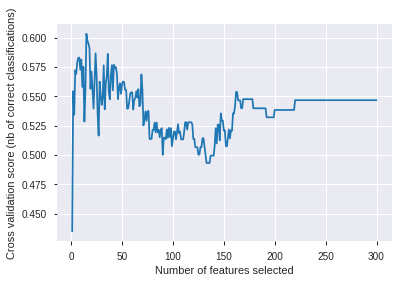

[False False False False False False  True False False False False False
 False False]
Index(['gender_TFV_Female', 'gender_TFV_Male', 'dementia_TFV_False',
       'dementia_TFV_True', 'smoker_TFV_no_smoker', 'smoker_TFV_smoker',
       'alcohol_TFV_extreme_drinking', 'alcohol_TFV_mild_drinking',
       'education_TFV_basic', 'education_TFV_higher', 'education_TFV_medium',
       'bmi', 'weight', 'apoe_TFV_E2E3'],
      dtype='object')
Index(['alcohol_TFV_extreme_drinking',
       'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild',
       'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate',
       'Medication_Type_1_TFV_Supplement',
       'Medication_Type_1_TFV_Painreliever',
       'Medication_Type_1_TFV_Antidepression',
       'Medication_Type_2_TFV_Supplement',
       'Medication_Type_3_TFV_AntiHypertension',
       'Medication_Type_6_TFV_Painreliever',
       'Medication_Type_6_TFV_Antiparkinson',
       'Medication_Type_7_TFV_Antithyroid',
       'Medication_Type_7_TFV_Pain

alcohol_TFV_extreme_drinking  \
0  1.0                            
1  1.0                            
2  1.0                            
3  1.0                            
4  1.0                            
5  1.0                            
6  1.0                            
7  0.0                            
8  1.0                            
9  1.0                            

   CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild  \
0  0.0                                                  
1  1.0                                                  
2  1.0                                                  
3  0.0                                                  
4  0.0                                                  
5  1.0                                                  
6  1.0                                                  
7  1.0                                                  
8  1.0                                                  
9  0.0                                                  

   CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate  \
0  1.0                                                      
1  0.0                                                      
2  0.0                                                      
3  1.0                                                      
4  1.0                                                      
5  0.0                                                      
6  0.0                                                      
7  0.0                                                      
8  0.0                                                      
9  1.0                                                      

   Medication_Type_1_TFV_Supplement  Medication_Type_1_TFV_Painreliever  \
0  0.000000                          0.000000                             
1  1.000000                          0.000000                             
2  1.000000                          1.000000                             
3  1.000000                          0.000000                             
4  0.000000                          0.000000                             
5  0.444444                          0.111111                             
6  0.000000                          0.000000                             
7  1.000000                          0.000000                             
8  1.000000                          0.000000                             
9  0.000000                          0.000000                             

   Medication_Type_1_TFV_Antidepression  Medication_Type_2_TFV_Supplement  \
0  0.000000                              0.000000                           
1  0.000000                              0.000000                           
2  0.000000                              1.000000                           
3  0.000000                              0.431034                           
4  0.000000                              1.000000                           
5  0.039683                              1.000000                           
6  0.000000                              1.000000                           
7  0.000000                              0.000000                           
8  0.000000                              1.000000                           
9  0.000000                              0.000000                           

   Medication_Type_3_TFV_AntiHypertension  Medication_Type_6_TFV_Painreliever  \
0  0.00                                    0.000000                             
1  0.00                                    0.113208                             
2  0.00                                    0.113208                             
3  0.13                                    0.113208                             
4  0.00                                    0.000000                             
5  0.00                                    0.113208                             
6  0.00                                    0.113208                         

In [21]:
# RFECV

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X, y = data_p_i, target_p_i

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig(result_path + 'RFECV_kerlinear', dpi=120, pad_inch=20)
plt.show()


# get important Feature List
important_feature_list = patient_df.columns[0:-2][rfecv.support_]
print (rfecv.support_[0:14])
print (patient_df.columns[0:14])
print (important_feature_list[0:14])

# patient_df after feature selection
data_target = np.append(data_p_s, target_p_s.reshape(target_p_s.shape[0],1), axis=1)
print (data_target[:,-1])
fea_columns = patient_df.columns.tolist()[0:-2]
class_column = patient_df.columns.tolist()[-1]
total_columns = fea_columns[:]
total_columns.append(class_column)
df_fea = pd.DataFrame(data_target, columns=total_columns)

patient_df_after_fea_selection = df_fea[df_fea.columns[0:-1][rfecv.support_]]
patient_df_after_fea_selection.head(10)



# <a id='06'>6.Machine Learning -Classification Model</a>

In [22]:
## Cross Validation Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import classification_report


X, y = data_p_s[:,rfecv.support_], target_p_s
print (X.shape, y.shape)
clf = RandomForestClassifier(n_estimators=100)
print (cross_validate(clf, X, y, scoring=['recall_macro', 'precision_macro', 'f1_macro', 'accuracy'], cv=5) )
y_pred = cross_val_predict(clf,X, y, cv=5 )
print(classification_report(y, y_pred, target_names=class_names_p))

(138, 15) (138,)


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



{'fit_time': array([0.10309625, 0.10204387, 0.09335637, 0.08849216, 0.0870657 ]), 'score_time': array([0.02664256, 0.02458191, 0.0226264 , 0.02226901, 0.02235293]), 'test_recall_macro': array([0.39722222, 0.57083333, 0.45833333, 0.71944444, 0.69027778]), 'test_precision_macro': array([0.48095238, 0.54867725, 0.44444444, 0.76111111, 0.66349206]), 'test_f1_macro': array([0.40387205, 0.54801587, 0.44301347, 0.72471777, 0.66984127]), 'test_accuracy': array([0.48275862, 0.57142857, 0.46428571, 0.7037037 , 0.65384615])}
              precision    recall  f1-score   support

        Slow       0.38      0.33      0.36        15
    Slow_MiS       1.00      0.80      0.89        10
      Normal       0.50      0.38      0.43        24
  Normal_MiS       0.48      0.50      0.49        26
        Fast       0.62      0.65      0.64        23
    Fast_MiS       0.58      0.70      0.64        40

    accuracy                           0.57       138
   macro avg       0.60      0.56      0.57   

In [23]:
## Cross Validation SVC
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import classification_report


X, y = data_p_s[:,rfecv.support_], target_p_s
clf = svm.SVC(gamma='scale', random_state=0)
print (cross_validate(clf, X, y, scoring=['recall_macro', 'precision_macro', 'f1_macro', 'accuracy',], cv=5) )
y_pred = cross_val_predict(clf,X, y, cv=5 )
print(classification_report(y, y_pred, target_names=class_names_p))

{'fit_time': array([0.0028708 , 0.00166655, 0.00149632, 0.00144672, 0.00146341]), 'score_time': array([0.00431681, 0.00285029, 0.00227928, 0.00251985, 0.00247788]), 'test_recall_macro': array([0.40694444, 0.48333333, 0.46805556, 0.59583333, 0.575     ]), 'test_precision_macro': array([0.32777778, 0.43690476, 0.43888889, 0.53611111, 0.6025641 ]), 'test_f1_macro': array([0.33705534, 0.4489899 , 0.4231424 , 0.55      , 0.53439153]), 'test_accuracy': array([0.4137931 , 0.57142857, 0.46428571, 0.62962963, 0.61538462])}
              precision    recall  f1-score   support

        Slow       0.50      0.07      0.12        15
    Slow_MiS       0.69      0.90      0.78        10
      Normal       0.55      0.46      0.50        24
  Normal_MiS       0.36      0.15      0.22        26
        Fast       0.52      0.52      0.52        23
    Fast_MiS       0.54      0.93      0.68        40

    accuracy                           0.54       138
   macro avg       0.53      0.50      0.47   

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vya

In [24]:
# Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#from fastai.imports import *
#from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import numpy as np 
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline 
pd.options.mode.chained_assignment = None


data_p_grid = data_p_s[:,rfecv.support_]

rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,100),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }
m = RandomForestClassifier()
m_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = m, scoring = "f1_macro", 
                                    verbose = 0, n_iter = 100, cv = 5)

m_r.fit(data_p_grid, target_p_s)

#m_r.fit(data_p, patient_df['patient_class_cat-Label'])

rf_bp = m_r.best_params_
print (rf_bp)

rf_classifier=RandomForestClassifier(n_estimators=rf_bp["n_estimators"],
                                     min_samples_split=rf_bp['min_samples_split'],
                                     min_samples_leaf=rf_bp['min_samples_leaf'],
                                     max_features=rf_bp['max_features'],
                                     max_depth=rf_bp['max_depth'],
                                     bootstrap=rf_bp['bootstrap'])

rf_classifier.fit(data_p_grid, target_p_s)


importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#print (indices)
# Print the feature ranking
print("Feature ranking:")
fea_list = important_feature_list # taken from RFECV
for f in range(len(fea_list)):
    print("%d. feature: %s (%f)" % (f + 1, fea_list[indices[f]], importances[indices[f]]))

# plot randomForest
estimator_id = 1  #need to change
estimator = rf_classifier.estimators_[1]

feature_names = fea_list
target_p_s_cat = pd.Series(data=target_p_s).replace({i:j for i, j in enumerate(class_names_p)})
#y_train_str =  class_names_p 
#target_p_s.astype('str') #target_p_s_cat.astype('str')

export_graphviz(estimator, out_file=result_path+'tree.dot', 
                feature_names = feature_names,
                class_names = class_names_p,
                rounded = True, proportion = False, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', result_path+'tree.dot', '-o', result_path+'tree.png', '-Gdpi=600'])
call(['dot', '-Tpdf', result_path+'tree.dot', '-o', result_path+'tree.pdf', '-Gdpi=600'])

from IPython.display import Image
Image(filename = result_path+'tree.png')

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pyt

{'n_estimators': 94, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
Feature ranking:
1. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate (0.142279)
2. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild (0.131074)
3. feature: Medication_Type_6_TFV_Antiparkinson (0.088429)
4. feature: Medication_Type_3_TFV_AntiHypertension (0.080475)
5. feature: Medication_Type_6_TFV_Painreliever (0.077478)
6. feature: Medication_Type_7_TFV_Antithyroid (0.067520)
7. feature: Medication_Type_1_TFV_Supplement (0.066530)
8. feature: alcohol_TFV_extreme_drinking (0.057521)
9. feature: Medication_Type_1_TFV_Painreliever (0.054324)
10. feature: Medication_Type_8_TFV_Painreliever (0.051992)
11. feature: Medication_Type_2_TFV_Supplement (0.051315)
12. feature: Medication_Type_7_TFV_Painreliever (0.045243)
13. feature: Medication_Type_9_TFV_Supplement (0.037003)
14. feature: Medication_Type_9_TFV_AntiHypertension (0.028663)
15. fe

In [25]:
## Cross Validation Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import classification_report


X, y = data_p_grid, target_p_s
print (X.shape, y.shape)
#print (cross_validate(rf_classifier, X, y, scoring=['recall_macro', 'precision_macro', 'f1_macro', 'accuracy'], cv=5) )
y_pred = cross_val_predict(rf_classifier,X, y, cv=5 )
print(classification_report(y, y_pred, target_names=class_names_p))

(138, 15) (138,)
              precision    recall  f1-score   support

        Slow       0.46      0.40      0.43        15
    Slow_MiS       1.00      0.60      0.75        10
      Normal       0.53      0.33      0.41        24
  Normal_MiS       0.62      0.62      0.62        26
        Fast       0.71      0.74      0.72        23
    Fast_MiS       0.59      0.80      0.68        40

    accuracy                           0.62       138
   macro avg       0.65      0.58      0.60       138
weighted avg       0.62      0.62      0.61       138



In [26]:
# For Data for particular patient
st_ix_p = 13
end_ix_p = 14
p = data_p_grid[st_ix_p:end_ix_p]
t = target_p_s[st_ix_p:end_ix_p]

print ('Mean Accuracy: ', rf_classifier.score(data_p_grid, target_p_s)*100)
print ('Predict Probability: ', rf_classifier.predict_proba(p)*100)
print ('Prediction: ', rf_classifier.predict(p))
print ('Target: ', t)

print('\n #########  Estimator ##################\n')
print ('Predict Probability Estimator', estimator.predict_proba(p)*100)
print ('Prediction Estimator: ', estimator.predict(p))
print ('Decision Path Estimator',estimator.decision_path(p).toarray())


importances = estimator.feature_importances_
indices = np.argsort(importances)[::-1]

print ('\nEstimator feature importance')
for f in range(len(importances)):
    print("%d. feature: %s (%f)" % (f + 1, fea_list[indices[f]], importances[indices[f]]))
    
def get_branch(clf, patient, target_names, estimator_id=1):
    branchs = []
    for j, tree in enumerate(clf.estimators_):
        #rule = static
        feature = tree.tree_.feature
        #print (feature)
        threshold = tree.tree_.threshold
        node_indicator = tree.decision_path(patient)
        #print ()
        # Similarly, we can also have the leaves ids reached by each sample.
        leave_id = tree.apply(patient)

        sample_id = 0
        node_index = node_indicator.indices[node_indicator.indptr[0]:
        node_indicator.indptr[1]]
        line = ''
        for node_id in node_index:
            #print (node_id)
            if leave_id[sample_id] == node_id:
                continue
            if (patient[sample_id][feature[node_id]] <= threshold[node_id]):
                threshold_sign = "<="
            else:
                threshold_sign = ">"
            line+= 'decision id node '+ str(node_id) + ':' + str(sample_id) + '( = )' + str(feature_names[feature[node_id]]) +') '+ str(patient[sample_id][feature[node_id]])+' '+str(threshold_sign) + " " + str(threshold[node_id])+'\n'
        #print (target_names[tree.predict(patient)[sample_id].astype('int32')])
        line+='classification: '+ str(target_names[tree.predict(patient)[sample_id].astype('int32')])
        branchs.append(line)
    return branchs[estimator_id]


print ('\n For Estimator: {} \n {}: '.format(estimator_id, get_branch(rf_classifier, p, class_names_p, 1)))
display(df_fea.iloc[st_ix_p:end_ix_p, :])

Mean Accuracy:  81.88405797101449
Predict Probability:  [[78.33333333  0.         20.27988855  0.          0.39893617  0.98784195]]
Prediction:  [0]
Target:  [0]

 #########  Estimator ##################

Predict Probability Estimator [[66.66666667  0.         33.33333333  0.          0.          0.        ]]
Prediction Estimator:  [0.]
Decision Path Estimator [[1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0]]

Estimator feature importance
1. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild (0.214829)
2. feature: Medication_Type_6_TFV_Antiparkinson (0.181223)
3. feature: Medication_Type_6_TFV_Painreliever (0.100395)
4. feature: Medication_Type_1_TFV_Supplement (0.085831)
5. feature: Medication_Type_2_TFV_Supplement (0.083282)
6. feature: Medication_Type_1_TFV_Painreliever (0.074162)
7. feature: Medication_Type_3_TFV_AntiHypertension (0.064677)
8. feature: alcohol_TF

gender_TFV_Female  gender_TFV_Male  dementia_TFV_False  dementia_TFV_True  \
13  1.0                0.0              0.0                 1.0                 

    smoker_TFV_no_smoker  smoker_TFV_smoker  alcohol_TFV_extreme_drinking  \
13  0.0                   1.0                0.0                            

    alcohol_TFV_mild_drinking  education_TFV_basic  education_TFV_higher  \
13  1.0                        0.0                  1.0                    

    education_TFV_medium   bmi  weight  apoe_TFV_E2E3  apoe_TFV_E2E4  \
13  0.0                   32.0  76.0    0.0            0.0             

    apoe_TFV_E3E3  apoe_TFV_E3E4  apoe_TFV_E4E4  \
13  1.0            0.0            0.0             

    CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild  \
13  0.0                                                  

    CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate  \
13  1.0                                                      

    Comorbidity_Type_TFV_Inflammatory  Comorbidity_Type_TFV_Respiratory  \
13  0.0                                0.0                                

    Comorbidity_Type_TFV_Musculoskeletal  Comorbidity_Type_TFV_Infectious  \
13  1.0                                   0.0                               

    Comorbidity_Type_TFV_Neurological  Comorbidity_Type_TFV_Cardiovascular  \
13  0.0                                0.0                                   

    Comorbidity_Type_TFV_Metabolic  Medication_Type_TFV_Antiinflammatory  \
13  0.0                             0.0                                    

    Medication_Type_TFV_Antifungal  Medication_Type_TFV_Antiestrogen  \
13  0.0                             0.0                                

    Medication_Type_TFV_Stimulant  Medication_Type_TFV_Antidiabetic  \
13  0.0                            0.0                                

    Medication_Type_TFV_Anticonvulsant  Medication_Type_TFV_AntiHypertension  \
13  0.0                                 0.0                                    

    Medication_Type_TFV_Estrogen  Medication_Type_TFV_Antipsychotic  \
13  0.0                           0.0                                 

    Medication_Type_TFV_Antiallergic  Medication_Type_TFV_Monoamine  \
13  0.0                               0.0                             

    Medication_Type_TFV_Vasodilator  Medication_Type_TFV_Antispasmodics  \
13  0.0                              0.0                                  

    Medication_Type_TFV_Antiarrhythmic  Medication_Type_TFV_Supplement  \
13  0.0                                 1.0                              

    Medication_Type_TFV_Antibiotic  Medication_Type_TFV_Pancrelipase  \
13  0.0                             0.0                                

    Medication_Type_TFV_Antiplatelet  Medication_Type_TFV_Antiasthmatic  \
13  0.0                               0.0                                 

    Medication_Type_TFV_Benzodiazepines  Medication_Type_TFV_Antihistamine  \
13  0.0                                  0.0                                 

    Medication_Type_TFV_Antimanic  Medication_Type_TFV_Alphablocker  \
13  0.0                            0.0                                

    Medication_Type_TFV_Antirheumatic  Medication_Type_TFV_Antithyroid  \
13  0.0                                0.0                               

    Medication_Type_TFV_Painreliever  Medication_Type_TFV_Antidepression  \
13  0.0                               0.0                                  

    Medication_Type_TFV_Antiparkinson  Medication_Type_TFV_Antioxidants  \
13  0.0                                0.0                                

    Medication_Type_TFV_HMG-CoA-Reductase  Medication_Type_TFV_Anticoagulant  \
13  0.0                                    0.0                                 

    Medication_Type_TFV_Dementia  Medication_Type_TFV_Hyperactivity  \
13  0.0                           0.0                                 

    Age_At_Episode  Medication_Type_1_T

In [27]:
# Important feature for a particular class for a patients
from itertools import chain
import collections

def get_branch_features(clf, patient, target_names, target_class, estimator_id=1):
    #branchs = []
    feature_names_list = []
    class_list= []
    for j, tree in enumerate(clf.estimators_):
        #rule = static
        feature = tree.tree_.feature
        #print (feature)
        threshold = tree.tree_.threshold
        node_indicator = tree.decision_path(patient)
        #print ()
        # Similarly, we can also have the leaves ids reached by each sample.
        leave_id = tree.apply(patient)

        sample_id = 0
        node_index = node_indicator.indices[node_indicator.indptr[0]:
        node_indicator.indptr[1]]
        line = ''
        feature_names_list_local=[]
        for node_id in node_index:
            #print (node_id)
            if leave_id[sample_id] == node_id:
                continue
            if (patient[sample_id][feature[node_id]] <= threshold[node_id]):
                threshold_sign = "<="
            else:
                threshold_sign = ">"
            feature_names_list_local.append(feature_names[feature[node_id]])
            #print ()
            #line+= 'decision id node '+ str(node_id) + ':' + str(sample_id) + '( = )' + str(feature_names[feature[node_id]]) +') '+ str(patient[sample_id][feature[node_id]])+' '+str(threshold_sign) + " " + str(threshold[node_id])+'\n'
        #print (target_names[tree.predict(patient)[sample_id].astype('int32')])
        #line+='classification: '+ str(target_names[tree.predict(patient)[sample_id].astype('int32')])
        #branchs.append(line)
        if (target_class==tree.predict(patient)[sample_id].astype('int32')):
            class_list.append(tree.predict(patient)[sample_id].astype('int32'))
            feature_names_list.append(feature_names_list_local)
    return feature_names_list


#print ('\n For Estimator: {} \n {}: '.format(estimator_id, get_branch(rf_classifier, p, class_names_p, 2, 1)))


p_classess_list = [[] for i in range(7)]
branch_important_feature = []
branch_important_feature_keys = []

for p,t in zip(p,[t]):
    p = p.reshape(1,-1)
    if t == 0:
        p_classess_list[0].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 1:
        p_classess_list[1].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 2:
        p_classess_list[2].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 3:
        p_classess_list[3].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 4:
        p_classess_list[4].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 5:
        p_classess_list[5].append(get_branch_features(rf_classifier, p, class_names_p, t))
    else:
        p_classess_list[6].append(get_branch_features(rf_classifier, p, class_names_p, t))
    
print ([len(x) for x in p_classess_list])             
    
def change_feature_name(x):
    if 'Age_At_Episode' in x:
        x = 'Age'
    elif 'Medication_Type_' in x:
        x = x.split('_')[-1]
    elif 'Comorbidity_Type_'   in x:
        x = x.split('_')[-1]
    return x

def d3_list_d1(l):
    ini_list = l
    flatten_list1 = list(chain.from_iterable(ini_list)) 
    flatten_list2 = list(chain.from_iterable(flatten_list1))
    return flatten_list2


for clss, p_class_list in zip(class_names_p, p_classess_list):
    p_class_flat_list = d3_list_d1(p_class_list)
    for n, x in enumerate(p_class_flat_list):
        p_class_flat_list[n] = change_feature_name(x)
    counter=collections.Counter(p_class_flat_list)
    print ('*'*20, clss, '*'*20)
    print(counter.most_common())
    print (branch_important_feature.append(list(counter.keys())))
    
display (patient_df_after_fea_selection[list(set([col for col in patient_df_after_fea_selection.columns for x in branch_important_feature[t[0]] if x in col]))][st_ix_p:end_ix_p])

[1, 0, 0, 0, 0, 0, 0]
******************** Slow ********************
[('Painreliever', 125), ('Supplement', 89), ('alcohol_TFV_extreme_drinking', 51), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild', 46), ('AntiHypertension', 43), ('Antithyroid', 43), ('Antiparkinson', 40), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate', 34), ('Antidepression', 12)]
None
******************** Slow_MiS ********************
[]
None
******************** Normal ********************
[]
None
******************** Normal_MiS ********************
[]
None
******************** Fast ********************
[]
None
******************** Fast_MiS ********************
[]
None


Medication_Type_1_TFV_Painreliever  Medication_Type_7_TFV_Painreliever  \
13  0.0                                 0.0                                  

    Medication_Type_6_TFV_Painreliever  \
13  0.0                                  

    Medication_Type_9_TFV_AntiHypertension  alcohol_TFV_extreme_drinking  \
13  0.0                                     0.0                            

    Medication_Type_3_TFV_AntiHypertension  \
13  0.0                                      

    Medication_Type_8_TFV_Painreliever  Medication_Type_2_TFV_Supplement  \
13  0.0                                 1.0                                

    CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate  \
13  1.0                                                      

    CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild  \
13  0.0                                                  

    Medication_Type_1_TFV_Antidepression  Medication_Type_1_TFV_Supplement  \
13  0.0                                   0.0                                

    Medication_Type_6_TFV_Antiparkinson  Medication_Type_7_TFV_Antithyroid  \
13  0.0                                  1.0                                 

    Medication_Type_9_TFV_Supplement  
13  0.0

In [28]:
# Important feature for a particular class for all patients

p_classess_list = [[] for i in range(len(class_names_p))]
branch_important_feature = []
    
for p,t in zip(data_p_grid, target_p_s):
    p = p.reshape(1,-1)
    if t == 0:
        p_classess_list[0].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 1:
        p_classess_list[1].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 2:
        p_classess_list[2].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 3:
        p_classess_list[3].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 4:
        p_classess_list[4].append(get_branch_features(rf_classifier, p, class_names_p, t))
    elif t == 5:
        p_classess_list[5].append(get_branch_features(rf_classifier, p, class_names_p, t))
    else:
        p_classess_list[6].append(get_branch_features(rf_classifier, p, class_names_p, t))
    
print ([len(x) for x in p_classess_list])             
    
def change_feature_name(x):
    if 'Age_At_Episode' in x:
        x = 'Age'
    elif 'Medication_Type_' in x:
        x = x.split('_')[-1]
    elif 'Comorbidity_Type_'   in x:
        x = x.split('_')[-1]
    return x

def d3_list_d1(l):
    ini_list = l
    flatten_list1 = list(chain.from_iterable(ini_list)) 
    flatten_list2 = list(chain.from_iterable(flatten_list1))
    return flatten_list2


for clss, p_class_list in zip(class_names_p, p_classess_list):
    p_class_flat_list = d3_list_d1(p_class_list)
    for n, x in enumerate(p_class_flat_list):
        p_class_flat_list[n] = change_feature_name(x)
    counter=collections.Counter(p_class_flat_list)
    print ('*'*20, clss, '*'*20)
    print(counter.most_common())
    print (branch_important_feature.append(list(counter.keys())))

print ('\n\n\n')
print ('Most important features for all classes', set.intersection(*[set(i) for i in branch_important_feature]))

[15, 10, 24, 26, 23, 40]
******************** Slow ********************
[('Painreliever', 1332), ('Supplement', 994), ('Antithyroid', 493), ('AntiHypertension', 484), ('Antiparkinson', 472), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate', 423), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild', 414), ('alcohol_TFV_extreme_drinking', 347), ('Antidepression', 115)]
None
******************** Slow_MiS ********************
[('Painreliever', 1168), ('AntiHypertension', 492), ('Antiparkinson', 383), ('Antithyroid', 335), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild', 262), ('Supplement', 252), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate', 247), ('alcohol_TFV_extreme_drinking', 110), ('Antidepression', 18)]
None
******************** Normal ********************
[('Painreliever', 1998), ('Supplement', 1529), ('AntiHypertension', 947), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate', 679), ('CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild', 656), (